In [39]:
import glob
import mne
path = r"C:\Users\HP\Desktop\data_set"
all_files = glob.glob(path + "/*.edf")
for file in all_files:
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names


Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\HP\Desktop\data_set\0000011.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [40]:
data.annotations

<Annotations | 0 segments>

In [41]:
for file in all_files:
    print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-07-18 18:01:22 UTC
 nchan: 21
 projs: []
 sfreq: 250.0 Hz
>
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-07-18 18:01:22 UTC
 nchan: 21
 projs: []
 sfreq: 250.0 Hz
>
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-07-18 18:01:22 UTC
 nchan: 21
 projs: []
 sfreq: 250.0 Hz
>
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas

In [42]:
print(raw_data)

[[-1.65692147e-07  1.02535969e-07  2.14692495e-07 ...  7.27429686e-08
   5.51587205e-08  4.90543442e-08]
 [-1.81133134e-07  9.60273594e-08  2.36431541e-07 ... -4.77142351e-08
  -6.50222133e-08 -8.38048623e-08]
 [-2.16330182e-07 -1.55520799e-07  5.09328550e-08 ...  2.64931167e-08
   7.08160319e-08  5.08500084e-08]
 ...
 [ 1.61234253e-07 -7.44538517e-08 -3.03790556e-08 ...  5.09538837e-08
   9.12935276e-08  8.32629503e-08]
 [ 1.41379200e-07  1.41300373e-07  1.33496578e-07 ...  6.29865289e-08
   7.91853160e-08  8.68511655e-08]
 [ 1.41379200e-07  1.41300373e-07  1.33496578e-07 ...  6.29865289e-08
   7.91853160e-08  8.68511655e-08]]


In [43]:
import matplotlib.pyplot as plt

 ...]

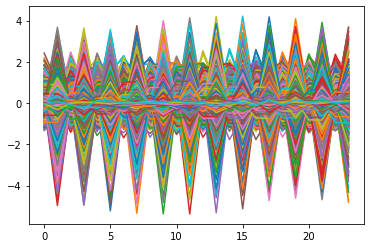

In [9]:
plt.plot(raw_data)

In [3]:
header=mne.io.find_edf_events()

AttributeError: module 'mne.io' has no attribute 'find_edf_events'

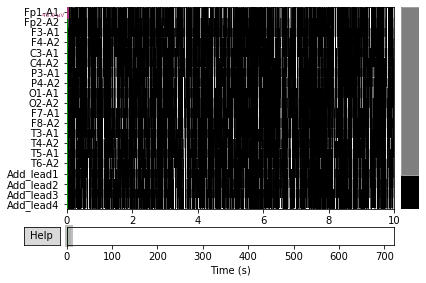

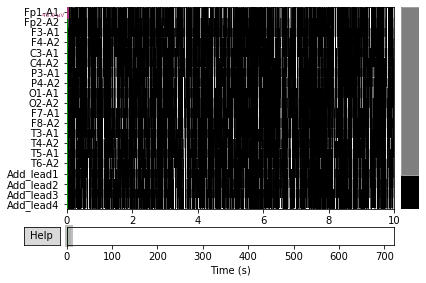

In [10]:
data.plot()

Effective window size : 10.240 (s)


<ipython-input-11-0fb5cd7a93c2>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd(fmax=15)


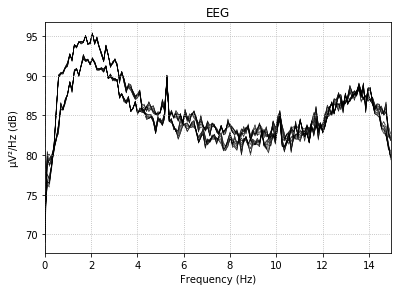

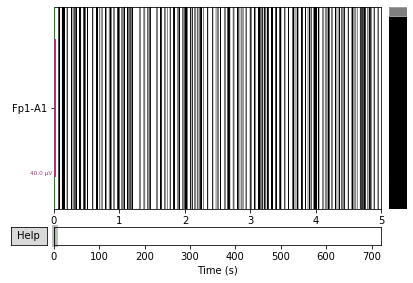

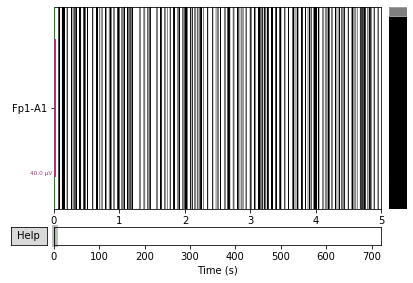

In [11]:
data.plot_psd(fmax=15)
data.plot(duration=5, n_channels=1)

In [53]:
for file in all_files:
    [row,col]=raw_data.shape
    print(raw_data.shape)


(21, 209250)
(21, 209250)
(21, 209250)
(21, 209250)
(21, 209250)
(21, 209250)


In [54]:
sample_per_min=250*60
sample_per_min

15000

In [55]:
import keras

In [56]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [57]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [78]:
j=0
i=j
j=sample_per_min
matrix=[]
while True:
    for file in all_files:
        for y in range(col):
            if (y==0) and (i==0):
                example_1=raw_data[0:sample_per_min]
                matrix=np.dstack((matrix, example_1))
                break
            elif y<col:
                example=raw_data[i:j]
                matrix=np.dstack((matrix, example))
                break
            elif y==col:
                example=raw_data[-15000: ]
                matrix=np.dstack((matrix, example))
                break
        if(file==all_files):
            matrix=matrix[:,:,1:]
    i=j
    j=j+sample_per_min

ValueError: all input arrays must have the same shape

In [79]:
matrix.shape

AttributeError: 'list' object has no attribute 'shape'